<a href="https://colab.research.google.com/github/MijulSaxena/EDA-project-on-Gooogle-playstore./blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project_by_Mijul_Saxena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [24]:
# importing numpy, pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exctract the data of google playstore

In [27]:
play_store_data = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')
user_reviews = pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

In [28]:
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [29]:
user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [31]:
# checking random data 
play_store_data.sample(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2324,PulsePoint Respond,MEDICAL,4.5,7837,21M,"100,000+",Free,0,Everyone,Medical,"July 31, 2018",2.4,4.1 and up
9986,Lux Home Decorating Room Games,FAMILY,4.0,1518,Varies with device,"100,000+",Free,0,Everyone,Casual,"October 20, 2017",2.0,4.1 and up
10077,EY GlobalOne,BUSINESS,2.7,11,6.8M,"1,000+",Free,0,Everyone,Business,"November 27, 2017",3.1.0,2.2 and up
3924,Fake Call - Fake Caller ID,PRODUCTIVITY,4.3,154668,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"August 2, 2018",Varies with device,Varies with device
6604,BP Log lite,LIFESTYLE,5.0,3,1.5M,100+,Free,0,Everyone,Lifestyle,"November 15, 2014",1.1,2.2 and up
774,GMAT Math Flashcards,EDUCATION,4.4,1769,Varies with device,"100,000+",Free,0,Everyone,Education,"July 11, 2018",Varies with device,Varies with device
1361,Period Tracker Clue: Period and Ovulation Tracker,HEALTH_AND_FITNESS,4.8,570242,20M,"10,000,000+",Free,0,Everyone,Health & Fitness,"August 2, 2018",5.0.2,4.1 and up
203,My Space - Employment Center,BUSINESS,4.5,67000,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 17, 2018",Varies with device,4.3 and up
20,Logo Maker - Small Business,ART_AND_DESIGN,4.0,450,14M,"100,000+",Free,0,Everyone,Art & Design,"April 20, 2018",4.0,4.1 and up
8100,Eshopcy.com.cy,SHOPPING,4.2,182,4.9M,"5,000+",Free,0,Everyone,Shopping,"August 3, 2018",1.3,2.2 and up


##**Data Cleaning and preperation of dataset**

In [32]:
play_store_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Checking dulpicates in App column 

In [33]:
#checking duplicates in app column through value_counts(which returns the frequency)
play_store_data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [34]:
#Removing the duplicate items
play_store_data.drop_duplicates(subset = 'App', inplace = True)

In [35]:
play_store_data.shape

(9660, 13)

##I observed that some columns are not that relevant also not responsible for app engagement and success like last updated date, current version, android version:.

In [36]:
# we can drop all those irrelevent data
play_store_data.drop(['Last Updated',	'Current Ver',	'Android Ver'], axis = 1, inplace = True)

In [38]:
play_store_data.shape

(9660, 10)

## I have successfully removed the irrelevant data. Now, dealing with null values.

In [16]:
# checking for null values in play store data
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [39]:
# find the index of null values in type and content rating
play_store_data[play_store_data['Type'].isnull()].index

Int64Index([9148], dtype='int64')

In [49]:
play_store_data.loc[9148, :]

App               Command & Conquer: Rivals
Category                             FAMILY
Rating                                  NaN
Reviews                                   0
Size                     Varies with device
Installs                                  0
Type                                    NaN
Price                                     0
Content Rating                 Everyone 10+
Genres                             Strategy
Name: 9148, dtype: object

In [40]:
play_store_data[play_store_data['Content Rating'].isnull()].index

Int64Index([10472], dtype='int64')

In [48]:
play_store_data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Name: 10472, dtype: object

In [50]:
# Since there is only one missing value in Content Rating and Type column. According to my observation it is best to drop them :
play_store_data.dropna(subset = ['Content Rating', 'Type'], inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


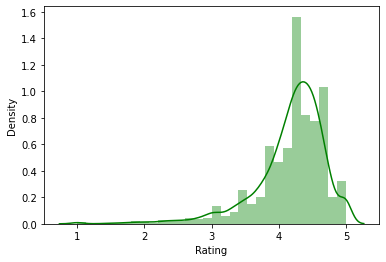

In [51]:
# checking for outliers
sns.distplot(play_store_data['Rating'],color='green',bins=30)

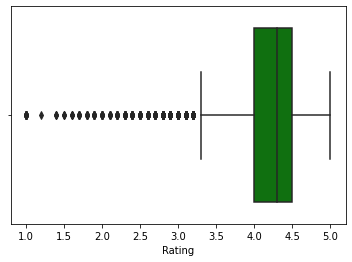

In [57]:
sns.boxplot(x='Rating', color = 'green', data = play_store_data)

In [53]:
# filling the null values with mode in rating column
mode_of_ratings = play_store_data['Rating'].mode()
play_store_data['Rating'].fillna(play_store_data['Rating'].mode()[0], inplace = True)

In [54]:
play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

There is no null value left

In [55]:
play_store_data.shape

(9658, 10)

In [56]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   object 
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
dtypes: float64(1), object(9)
memory usage: 830.0+ KB


##**We can see from the above statement that columns like reviews, size, installs and price have object datatype instead of any numeric datatype. So, let's convert them into numeric datatype.**

In [58]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [64]:
# removing the ',' and '+' symbol from installs columns
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.strip('+'))
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: x.replace(',', ''))

In [66]:
play_store_data.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,4.3,38,9.8M,5000,Free,0,Everyone,Maps & Navigation
10832,FR Tides,WEATHER,3.8,1195,582k,100000,Free,0,Everyone,Weather
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,1000,Free,0,Everyone,Books & Reference
10834,FR Calculator,FAMILY,4.0,7,2.6M,500,Free,0,Everyone,Education
10835,FR Forms,BUSINESS,4.3,0,9.6M,10,Free,0,Everyone,Business
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,10000000,Free,0,Everyone,Lifestyle


After observing the size column. 

In [ ]:
# converting KB to MB
play_store_data['Size'] = play_store_data[Size.apply(lambda x: x.replace('M', '') if 'M' in str(x) else x)
play_store_data['Size'] = play_store_data.Size.apply(lambda x: x.replace('', ''))
play_store_data['Size'] = play_store_data.Size.apply(lambda x: x.replace('M', ''))

In [ ]:
play_store_data = play_store_data.astype({'Reviews' : , Size, Installs, & price})